* https://www.aanda.org/articles/aa/full_html/2016/05/aa28065-15/F1.html

In [1]:
import astroquery
assert astroquery.__version__=='0.4.5'

https://astroquery.readthedocs.io/en/latest/ipac/nexsci/nasa_exoplanet_archive.html

In [68]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive
import pandas as pd

redownload = False
fp = '../data/nexsci_data.csv'
if redownload:
    #pstable combines data from the Confirmed Planets and Extended Planet Parameters tables
    tab = NasaExoplanetArchive.query_criteria(table="pscomppars", 
                                             where="discoverymethod like 'Transit'"

                                            ) 
    df.to_csv(fp, index=True)
    df = tab.to_pandas()
else:
    df = pd.read_csv(fp, index_col=0)
    df.index.name = 'index'
df.head()

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,discoverymethod,disc_locale,...,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,x,y,z,htm20,sky_coord.ra,sky_coord.dec
index,,,,,,,,,,,,,,,,,,,,,
0,Kepler-276 c,c,Kepler-276,NaN,NaN,TIC 138213510,2014-02,2013,Transit,Space,...,7.99553,0.051580,-0.051580,7.9955300&plusmn;0.0515805,0.310575,-0.711954,0.629813,1302657699,293.568197,39.036312
1,Kepler-829 b,b,Kepler-829,NaN,NaN,TIC 123451768,2016-05,2016,Transit,Space,...,7.93777,0.040833,-0.040833,7.9377700&plusmn;0.0408326,0.157566,-0.720680,0.675124,-792260935,282.332831,42.463813
2,K2-283 b,b,K2-283,NaN,NaN,TIC 266017624,2018-12,2018,Transit,Space,...,-10.97340,0.053624,-0.053624,-10.9734000&plusmn;0.0536244,0.959702,0.224997,0.168368,609813555,13.194368,9.692918
3,Kepler-477 b,b,Kepler-477,NaN,NaN,TIC 158633329,2016-05,2016,Transit,Space,...,-26.00000,NaN,NaN,-26.0,0.229185,-0.702544,0.673726,-1968935374,288.067445,42.355305
4,HAT-P-15 b,b,HAT-P-15,NaN,NaN,TIC 353459965,2010-12,2010,Transit,Ground,...,14.40340,0.128671,-0.128671,14.403400&plusmn;0.128671,0.310968,0.706667,0.635547,-1944697636,66.248142,39.460602


In [3]:
from uncertainties import ufloat

def upper_boundary(period, method='stripe'):
    if method=='stripe':
        return -0.33*period+1.17
    elif method=='likelihood':
        a=ufloat(0.31,0.12)
        b=ufloat(1.19,0.06)
        return -a*period+b
    
def lower_boundary(period, method='stripe'):
    if method=='stripe':
        return 0.68*period
    elif method=='likelihood':
        a=ufloat(0.67,0.06)
        b=ufloat(0.01,0.04)
        return a*period-b

In [17]:
similar_planets=["K2-25 b","K2-320 b","GJ 1214 b","TOI-269 b","TOI-2406 b"]
df2=df[df["pl_name"].isin(similar_planets)]
df2

,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,discoverymethod,disc_locale,...,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,x,y,z,htm20,sky_coord.ra,sky_coord.dec
480,K2-320 b,b,K2-320,,,TIC 281748980,2020-07,2020,Transit,Space,...,-58.4369,0.156458,-0.156458,-58.436900&plusmn;0.156458,-0.953477,0.286929,0.092483,1327132333,163.251912,5.306478
2137,GJ 1214 b,b,GJ 1214,,,TIC 467929202,2009-12,2009,Transit,Ground,...,580.4470,0.479398,-0.479398,580.447000&plusmn;0.479398,-0.192971,-0.977387,0.086472,-2037770512,258.831399,4.960680
2860,K2-25 b,b,K2-25,,,TIC 434226736,2016-02,2015,Transit,Space,...,122.1480,0.222611,-0.222611,122.148000&plusmn;0.222611,0.433894,0.861726,0.262993,1465639053,63.273935,15.247703
3387,TOI-269 b,b,TOI-269,,,TIC 220479565,2021-04,2021,Transit,Space,...,26.4720,0.043214,-0.043214,26.4720000&plusmn;0.0432139,0.143113,0.567506,-0.810836,-1698598065,75.846283,-54.177721
3410,TOI-2406 b,b,TOI-2406,,,TIC 212957629,2021-07,2021,Transit,Space,...,225.7520,0.202525,-0.202525,225.752000&plusmn;0.202525,0.986501,0.152825,-0.058820,-289013690,8.806054,-3.372083


In [45]:
idx=(df.pl_orbper>1) & (df.pl_orbper<10) & (df.pl_rade<8) & (df.pl_rade>4) & (df.st_teff<3800)
df.loc[idx,['pl_name','pl_orbper','pl_rade','st_teff','st_rad']]

,pl_name,pl_orbper,pl_rade,st_teff,st_rad
2770,TOI-674 b,1.977143,5.25,3514.0,0.42
2884,AU Mic b,8.463000,4.07,3700.0,0.75
3144,K2-33 b,5.424865,5.04,3540.0,1.05
3255,Kepler-1624 b,3.290305,5.70,3636.0,0.47
3368,K2-14 b,8.368020,4.81,3789.0,0.45


/home/jp/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


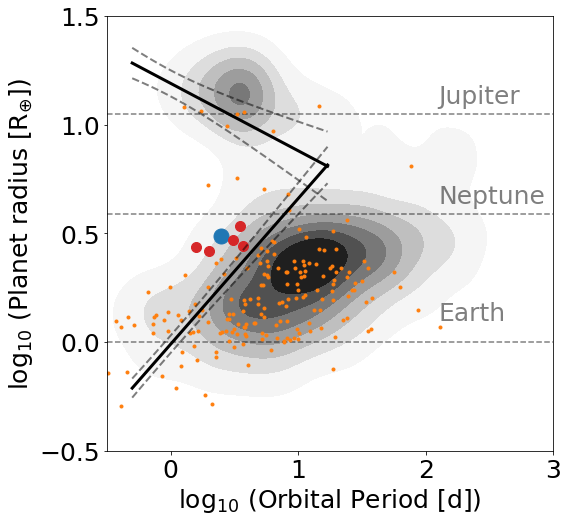

In [29]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pl
pl.rcParams['font.size'] = 25


fig, ax = pl.subplots(figsize=(8,8))

xmin,xmax=np.log10(0.5), np.log10(17) #day
x=np.linspace(xmin,xmax)

method='likelihood'
y1=[i.n for i in upper_boundary(x,method=method)]
ys1=[i.s for i in upper_boundary(x,method=method)]

y2=[i.n for i in lower_boundary(x,method=method)]
ys2=[i.s for i in lower_boundary(x,method=method)]

#toi1696
Rp,per=3.09,2.5
ax.plot(np.log10(2.5), np.log10(3.09), 'o', c='C0', ms=15)#, label="TOI 1696b")
# ax.errorbar(np.log10(per), 
#             np.log10(Rp), 
#             yerr=np.c_[(np.log10(Rp-0.11),np.log10(Rp+0.11))].T, 
#             yerr=np.log10(0.11),
#             marker='o',
#             c='C0', 
#             ms=15, 
#             label="TOI 1696b")
# ax.legend()
#known planets
idx = df.st_teff<=3800 #around M dwarfs
ax.plot(np.log10(df.loc[idx,'pl_orbper']), 
        np.log10(df.loc[idx,'pl_rade']), 
        '.', 
        c='C1'
       )
#most similar planets
ax.plot(np.log10(df2.loc[idx,'pl_orbper']), 
        np.log10(df2.loc[idx,'pl_rade']), 
        'o', 
        ms=10,
        c='C3'
       )
#density contour
_ = sb.kdeplot(np.log10(df['pl_orbper']), 
               np.log10(df['pl_rade']), 
               cmap='gray_r', 
               n_levels=8, 
               log_scale=False, 
               fill=True, 
               ax=ax, 
               zorder=-1)

#upper boundary
ax.plot(x,y1,'k-',lw=3,zorder=10)
ax.plot(x,np.add(y1,ys1),'k--',lw=2,zorder=10,alpha=0.5)
ax.plot(x,np.subtract(y1,ys1),'k--',lw=2,zorder=10,alpha=0.5)
#lower boundary
ax.plot(x,y2,'k-',lw=3,zorder=10)
ax.plot(x,np.add(y2,ys2),'k--',lw=2,zorder=10,alpha=0.5)
ax.plot(x,np.subtract(y2,ys2),'k--',lw=2,zorder=10,alpha=0.5)


ax.set_xlabel("$\log_{10}$ (Orbital Period [d])")
ax.set_ylabel("$\log_{10}$ (Planet radius [R$_{\oplus}$])")

alpha = 0.5
ax.axhline(np.log10(1), 0, 1, c='k', ls='--', alpha=alpha, zorder=0)
dx = 2.1
ax.text(dx, 0.1, 'Earth', alpha=alpha)
Rnep = np.log10(3.88)
ax.axhline(Rnep, 0, 1, c='k', ls='--', alpha=alpha, zorder=0)
ax.text(dx, Rnep+0.05, 'Neptune', alpha=alpha)
Rjup = np.log10(11.2)
ax.axhline(Rjup, 0, 1, c='k', ls='--', alpha=alpha, zorder=0)
ax.text(dx, Rjup+0.05, 'Jupiter', alpha=alpha)
ax.set_ylim(-0.5,1.5)
ax.set_xlim(-0.5,3)

ax.locator_params(axis='y', nbins=4)
ax.locator_params(axis='x', nbins=4)

In [30]:
fig.savefig('../paper/figures/neptune_desert.png', bbox_inches='tight')